In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Added shopping_cart.png for wordcloud")

Added shopping_cart.png for wordcloud


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Let us pre-process the data
data= pd.read_csv("Mental-health-related-subreddits.csv")
pd.set_option('max_colwidth', 500)
data.head(5)

,Title,Text,Subreddit
0,exposure does not work!,"I have struggled with social anxiety from childhood and the main advice from friends, self-help books and professionals is to expose myself to those environments but I'm not better off!\n\nExample: I get anxious every single time I go into a shop even though I have been doing my own shopping daily/ weekly since being 16.\n\nI get nervous, sweaty, heart pounding every time I go into the gym, yet I have been working out at the same gym for years.\n\nHas exposure not worked for anyone else?",Anxiety
1,Panic attack? derealization? can't go to doctors? Advice Appreciated!,"Back in March (I know, a while ago D:), I woke up that day to go to school but I was feeling kind of 'off' I felt depressed, I didn't really feel like getting up or even seeing anyone. I have a history of this :P \n// It's really on and off but it mainly happens in the winter time. I get highly anxious also going out anywhere during these periods of time, I get suspicious and paranoid of everyone or anything. I usually end up isolating myself in my room until it's all over and eat way less t...",Anxiety
2,How long can a panic attack last?!,"I've been withdrawing from medicines lately (effexor, zyprexa and cymbalta) not all at the same time mind you, but they have been close together in withdraw. \nThursday I had a major panic attack, so bad that I needed to take extra of my kolonopin and had to skip work Friday. It only lasted about 30mins, but I was shaky and felt sick the rest of the night. Now it's saturday, not quite two full days after the panic attack started and I still feel as I like to describe 'like a chihuahua', or l...",Anxiety
3,Stepping stones,"First time poster, long time lurker. \n\nI've had anxiety for over 6 years, and it's always been a crippling, miserable experience. I feel like I've lost out on so much of my life due to being too scared to pursue friendships past a ""hello"", and too self conscious to voice my opinion or be myself. \nIt's still hard, I still can't fully be myself around many many people, and struggle to hold conversations without feeling like I'm being a burden, but recently I've made myself proud, and I thou...",Anxiety
4,"Coping with anxiety over climate change, on the verge of considering suicide if this does not change","Hi all,\n\nI made a throwaway account as my main account is one that my friends and family know about. I've dealt with anxiety for around eight years. I had full blown panic attacks over the thought of non-existence for about 9 months straight and eventually got a hold of it. They've come back over time, with one stretch being about a month long, but I've learned to somewhat manage it when it happens. I still, from time to time, grapple with the fear of death though.\n\nLast year, I had abou...",Anxiety


In [ ]:
# Getting first 100000 rows
data = data.sample(n=100000,replace=True)

In [ ]:
data.describe()

,Title,Text,Subreddit
count,488468,488472,488469
unique,442580,484361,7
top,Help,"MEGA THREAD. Here we discuss embarrassing stories, funny stories, WTF stories, and everything in between. Need to get something off your chest? Here's the place to do it. Not yet diagnosed and want to ask a question? Feel free to do it here. Pretty much anything goes in Fearless Fridays",depression
freq,457,103,258496


In [ ]:
#merge data columns and rename the final column
data["Title"] = data["Title"] + " " + data["Text"]
data.drop('Text', inplace=True, axis=1)
data.rename(columns={"Title": "Content"}, inplace=True)
data.head()


,Content,Subreddit
0,"exposure does not work! I have struggled with social anxiety from childhood and the main advice from friends, self-help books and professionals is to expose myself to those environments but I'm not better off!\n\nExample: I get anxious every single time I go into a shop even though I have been doing my own shopping daily/ weekly since being 16.\n\nI get nervous, sweaty, heart pounding every time I go into the gym, yet I have been working out at the same gym for years.\n\nHas exposure not wor...",Anxiety
1,"Panic attack? derealization? can't go to doctors? Advice Appreciated! Back in March (I know, a while ago D:), I woke up that day to go to school but I was feeling kind of 'off' I felt depressed, I didn't really feel like getting up or even seeing anyone. I have a history of this :P \n// It's really on and off but it mainly happens in the winter time. I get highly anxious also going out anywhere during these periods of time, I get suspicious and paranoid of everyone or anything. I usually end...",Anxiety
2,"How long can a panic attack last?! I've been withdrawing from medicines lately (effexor, zyprexa and cymbalta) not all at the same time mind you, but they have been close together in withdraw. \nThursday I had a major panic attack, so bad that I needed to take extra of my kolonopin and had to skip work Friday. It only lasted about 30mins, but I was shaky and felt sick the rest of the night. Now it's saturday, not quite two full days after the panic attack started and I still feel as I like t...",Anxiety
3,"Stepping stones First time poster, long time lurker. \n\nI've had anxiety for over 6 years, and it's always been a crippling, miserable experience. I feel like I've lost out on so much of my life due to being too scared to pursue friendships past a ""hello"", and too self conscious to voice my opinion or be myself. \nIt's still hard, I still can't fully be myself around many many people, and struggle to hold conversations without feeling like I'm being a burden, but recently I've made myself p...",Anxiety
4,"Coping with anxiety over climate change, on the verge of considering suicide if this does not change Hi all,\n\nI made a throwaway account as my main account is one that my friends and family know about. I've dealt with anxiety for around eight years. I had full blown panic attacks over the thought of non-existence for about 9 months straight and eventually got a hold of it. They've come back over time, with one stretch being about a month long, but I've learned to somewhat manage it when it...",Anxiety


In [ ]:
data = data[['Subreddit', 'Content']]

In [ ]:
data.head()

,Subreddit,Content
0,Anxiety,"exposure does not work! I have struggled with social anxiety from childhood and the main advice from friends, self-help books and professionals is to expose myself to those environments but I'm not better off!\n\nExample: I get anxious every single time I go into a shop even though I have been doing my own shopping daily/ weekly since being 16.\n\nI get nervous, sweaty, heart pounding every time I go into the gym, yet I have been working out at the same gym for years.\n\nHas exposure not wor..."
1,Anxiety,"Panic attack? derealization? can't go to doctors? Advice Appreciated! Back in March (I know, a while ago D:), I woke up that day to go to school but I was feeling kind of 'off' I felt depressed, I didn't really feel like getting up or even seeing anyone. I have a history of this :P \n// It's really on and off but it mainly happens in the winter time. I get highly anxious also going out anywhere during these periods of time, I get suspicious and paranoid of everyone or anything. I usually end..."
2,Anxiety,"How long can a panic attack last?! I've been withdrawing from medicines lately (effexor, zyprexa and cymbalta) not all at the same time mind you, but they have been close together in withdraw. \nThursday I had a major panic attack, so bad that I needed to take extra of my kolonopin and had to skip work Friday. It only lasted about 30mins, but I was shaky and felt sick the rest of the night. Now it's saturday, not quite two full days after the panic attack started and I still feel as I like t..."
3,Anxiety,"Stepping stones First time poster, long time lurker. \n\nI've had anxiety for over 6 years, and it's always been a crippling, miserable experience. I feel like I've lost out on so much of my life due to being too scared to pursue friendships past a ""hello"", and too self conscious to voice my opinion or be myself. \nIt's still hard, I still can't fully be myself around many many people, and struggle to hold conversations without feeling like I'm being a burden, but recently I've made myself p..."
4,Anxiety,"Coping with anxiety over climate change, on the verge of considering suicide if this does not change Hi all,\n\nI made a throwaway account as my main account is one that my friends and family know about. I've dealt with anxiety for around eight years. I had full blown panic attacks over the thought of non-existence for about 9 months straight and eventually got a hold of it. They've come back over time, with one stretch being about a month long, but I've learned to somewhat manage it when it..."


In [ ]:
data.describe()

,Subreddit,Content
count,488469,488468
unique,7,486850
top,depression,"FEARLESS FRIDAYS MEGA THREAD. Here we discuss embarrassing stories, funny stories, WTF stories, and everything in between. Need to get something off your chest? Here's the place to do it. Not yet diagnosed and want to ask a question? Feel free to do it here. Pretty much anything goes in Fearless Fridays"
freq,258496,103


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488472 entries, 0 to 488471
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Subreddit  488469 non-null  object
 1   Content    488468 non-null  object
dtypes: object(2)
memory usage: 7.5+ MB


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488468 entries, 0 to 488471
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Subreddit  488468 non-null  object
 1   Content    488468 non-null  object
dtypes: object(2)
memory usage: 11.2+ MB


In [ ]:
data.Subreddit.value_counts()

depression       258495
Anxiety           86243
bipolar           41493
mentalhealth      39373
BPD               38216
schizophrenia     17506
autism             7142
Name: Subreddit, dtype: int64

In [ ]:
exampleArray = np.array([[1,1],[1,2],[4,5]])
exampleFrame = pd.DataFrame(exampleArray,columns=["ex1","ex2"])
exampleFrame

,ex1,ex2
0,1,1
1,1,2
2,4,5


In [ ]:
ex1 = exampleFrame.drop_duplicates(subset="ex1",keep="first")
print("Without ignore_index")
print(ex1)
ex2 = exampleFrame.drop_duplicates(subset="ex1",keep="first",ignore_index=True)
print("With ignore_index")
print(ex2)

Without ignore_index
   ex1  ex2
0    1    1
2    4    5
With ignore_index
   ex1  ex2
0    1    1
1    4    5


In [ ]:
data.Content.duplicated(keep="first").value_counts()

False    486850
True       1618
Name: Content, dtype: int64

In [ ]:
data.drop_duplicates(subset="Content",keep="first",inplace=True,ignore_index=True)
data.describe()

,Subreddit,Content
count,486850,486850
unique,7,486850
top,depression,"exposure does not work! I have struggled with social anxiety from childhood and the main advice from friends, self-help books and professionals is to expose myself to those environments but I'm not better off!\n\nExample: I get anxious every single time I go into a shop even though I have been doing my own shopping daily/ weekly since being 16.\n\nI get nervous, sweaty, heart pounding every time I go into the gym, yet I have been working out at the same gym for years.\n\nHas exposure not wor..."
freq,257982,1


In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio

init_notebook_mode(True)

fig = px.bar(x=data.Subreddit.value_counts().index,y=data.Subreddit.value_counts(),color=data.Subreddit.value_counts().index,text=data.Subreddit.value_counts())
fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white", showlegend=False)
iplot(fig)

In [ ]:
fig1 = px.pie(data,values=data.Subreddit.value_counts(),names=data.Subreddit.value_counts().index)
fig1.update_traces(textposition='auto', textinfo='percent+label',marker={"line":{"width":1}},hoverinfo='label+percent',hole=0.4)
fig1.update_layout(annotations=[{"text":"Percentages","showarrow":False,"font_size":17}])
iplot(fig1)

In [ ]:
import re

wordList = list()
for i in range(len(data)):
    temp = data.Content[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordList.append(k)

In [ ]:
from collections import Counter

wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)

print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

Most Used 20 Words
I : 5082798
to : 3204726
and : 2885966
the : 1990751
a : 1948452
my : 1739717
of : 1447777
me : 1229978
that : 1116560
it : 1087730
in : 1023726
Im : 929206
for : 864936
have : 832138
is : 825309
but : 792227
with : 766720
was : 733992
just : 709621
this : 703672


In [ ]:
for i in data["Content"][7:10]:
    if "I" in i:
        print(i)
        print("*"*20)

Lifetime anxiety 47M

I've been anxious for as long as I can remember. When I was 7, I made my sister go ask for ketchup at McDonalds because I was so afraid. Anxiety has cost me relationships, jobs, friends, money. I don't have FOMO, but I know I've missed out,
********************
Social anxiety help for NYE - I don't know anyone Hi r/anxiety 

I'm invited to a new year eve party tonight with all my boyfriend's friends. We've been together 4.5 years. However, I've only met his whole friendship group a couple of times due to my anxiety with large groups of people and, you know, just anxiety in general.

Last time I went and met them all, there were a couple of girls I really liked and seemed to get on well with. We followed each other on insta and facebook and that was that. We'd like and comment on each other's stuff but that was it. 

I thought that they'd be going to this party tonight so I looked them up to see if they were going, however both of them have deleted me off their soc

In [ ]:
wordList = list()
for i in range(len(data)):
    temp = data.Content[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordList.append(k)
wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
print("REAL Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

REAL Most Used 20 Words
I : 5082798
to : 3204726
and : 2885966
the : 1990751
a : 1948452
my : 1739717
of : 1447777
me : 1229978
that : 1116560
it : 1087730
in : 1023726
Im : 929206
for : 864936
have : 832138
is : 825309
but : 792227
with : 766720
was : 733992
just : 709621
this : 703672


In [ ]:
num = 75 # For using most used 75 words
list1 = list()
list2 = list()
for i in range(num):
    list1.append(wordCount.most_common(num)[i][0])
    list2.append(wordCount.most_common(num)[i][1])

In [ ]:
fig2 = px.bar(x=list1,y=list2,color=list2,hover_name=list1,hover_data={'Word':list1,"Count":list2})
fig2.update_traces(hovertemplate="Word:'%{x}' Value: %{y}")
fig2.update_layout(title={"text":"Word Values","x":0.5,"font":{"size":30}},xaxis={"title":"Words","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white")
fig2.show()

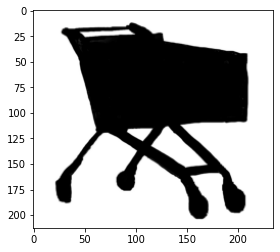

In [ ]:
from PIL import Image

shopping_cart = np.array(Image.open("shopping_cart.png"))
plt.imshow(shopping_cart)

In [ ]:
# from wordcloud import WordCloud
from nltk.corpus import stopwords

     ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 262.0/262.0 KB 3.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Kazi Tanvir Akter\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,0%%, %d%%)" % np.random.randint(50,55))

stopwordCloud = set(stopwords.words("english"))

wordcloud = WordCloud(stopwords=stopwordCloud,max_words=1000,background_color="white",min_font_size=3).generate_from_frequencies(countedWordDict)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=[13,10])
plt.axis("off")
plt.title("Word Cloud",fontsize=20)
plt.imshow(wordcloud)
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import time

ps = PorterStemmer()
stopwordSet = set(stopwords.words('english'))

t = time.time()

def leadMyWord(Content):
    Content = re.sub('[^a-zA-ZğĞüÜşŞıİöÖçÇ]'," ",Content)
    Content = Content.lower()
    Content = word_tokenize(Content,language='english')
    Content = [word for word in Content if not word in stopwordSet]
    Content = " ".join(Content)
    return Content   

textList = data.Content.apply(leadMyWord)
textList = list(textList)

In [ ]:
print("Before")
print(data["Content"][2])
print("After")
print(textList[2])
print("Time Passed")
print(time.time()-t)

Before
How long can a panic attack last?! I've been withdrawing from medicines lately (effexor, zyprexa and cymbalta) not all at the same time mind you, but they have been close together in withdraw. 
Thursday I had a major panic attack, so bad that I needed to take extra of my kolonopin and had to skip work Friday. It only lasted about 30mins, but I was shaky and felt sick the rest of the night. Now it's saturday, not quite two full days after the panic attack started and I still feel as I like to describe 'like a chihuahua', or like I had too much caffeine! I haven't had any except for a small amount of chocolate yesterday...it feels like I've been on the edge of a panic attack since my initial one. 
I'm not sure what to do!
After
long panic attack last withdrawing medicines lately effexor zyprexa cymbalta time mind close together withdraw thursday major panic attack bad needed take extra kolonopin skip work friday lasted mins shaky felt sick rest night saturday quite two full days p

In [ ]:
textList[1205]

'medication helped ive struggling debilitating anxiety past months since panic attack set swear feel like giving weeks better weeks let waves anxiety restlessness hit periodically cry really need something help im completely miserable depressed future anyone experience different anxiety medications particularly ssris dr talking prescribing im scared become dependant medication bad side effects advice would good'

In [ ]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["Subreddit"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[0 0 0 ... 6 6 6]
To_Categorical
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

MAX_FEATURES = 20000

onehot_corpus = []
for text in textList:
    onehot_corpus.append(one_hot(text,MAX_FEATURES))
    
maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ", maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')
x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.25,random_state=42)

Max number of words :  3519


In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(MAX_FEATURES, 100, input_length=maxTextLen))


    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))
    
    #model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    
    model.add(Dense(units=y_train2.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

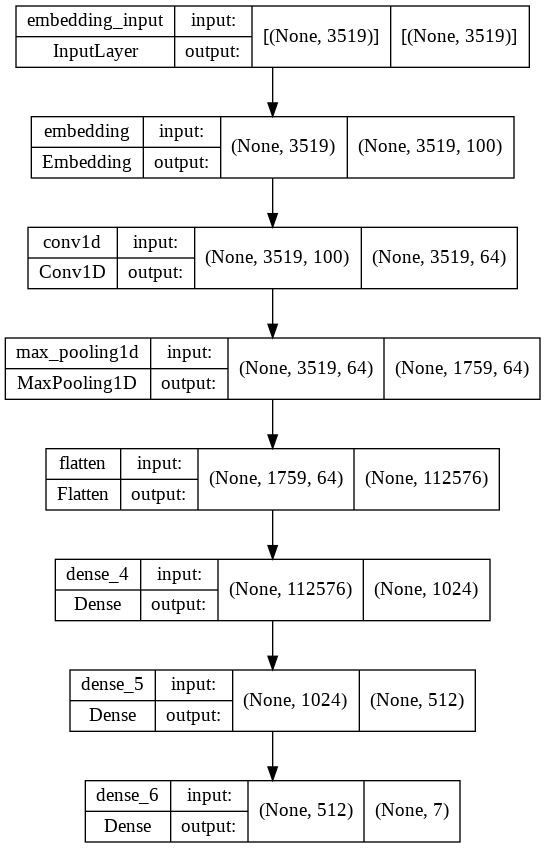

In [ ]:
cnn_model = build_cnn_model()
plot_model(cnn_model,show_shapes=True)

In [ ]:
cnn_history = cnn_model.fit(x_train2,epochs=20,batch_size=512,shuffle=True)
ypred2 = cnn_model.predict(x_test2)

Epoch 1/20
240/240 [==============================] - 77s 317ms/step - loss: 1.2853 - accuracy: 0.5745
Epoch 2/20
240/240 [==============================] - 76s 315ms/step - loss: 1.0747 - accuracy: 0.6446
Epoch 3/20
240/240 [==============================] - 76s 315ms/step - loss: 0.9843 - accuracy: 0.6785
Epoch 4/20
240/240 [==============================] - 75s 314ms/step - loss: 0.8997 - accuracy: 0.7027
Epoch 5/20
240/240 [==============================] - 75s 314ms/step - loss: 0.8401 - accuracy: 0.7206
Epoch 6/20
240/240 [==============================] - 76s 315ms/step - loss: 0.7850 - accuracy: 0.7468
Epoch 7/20
240/240 [==============================] - 76s 315ms/step - loss: 0.7277 - accuracy: 0.7704
Epoch 8/20
240/240 [==============================] - 76s 316ms/step - loss: 0.6799 - accuracy: 0.7857
Epoch 9/20
240/240 [==============================] - 76s 317ms/step - loss: 0.6408 - accuracy: 0.7986
Epoch 10/20
240/240 [==============================] - 76s 317ms/step - l

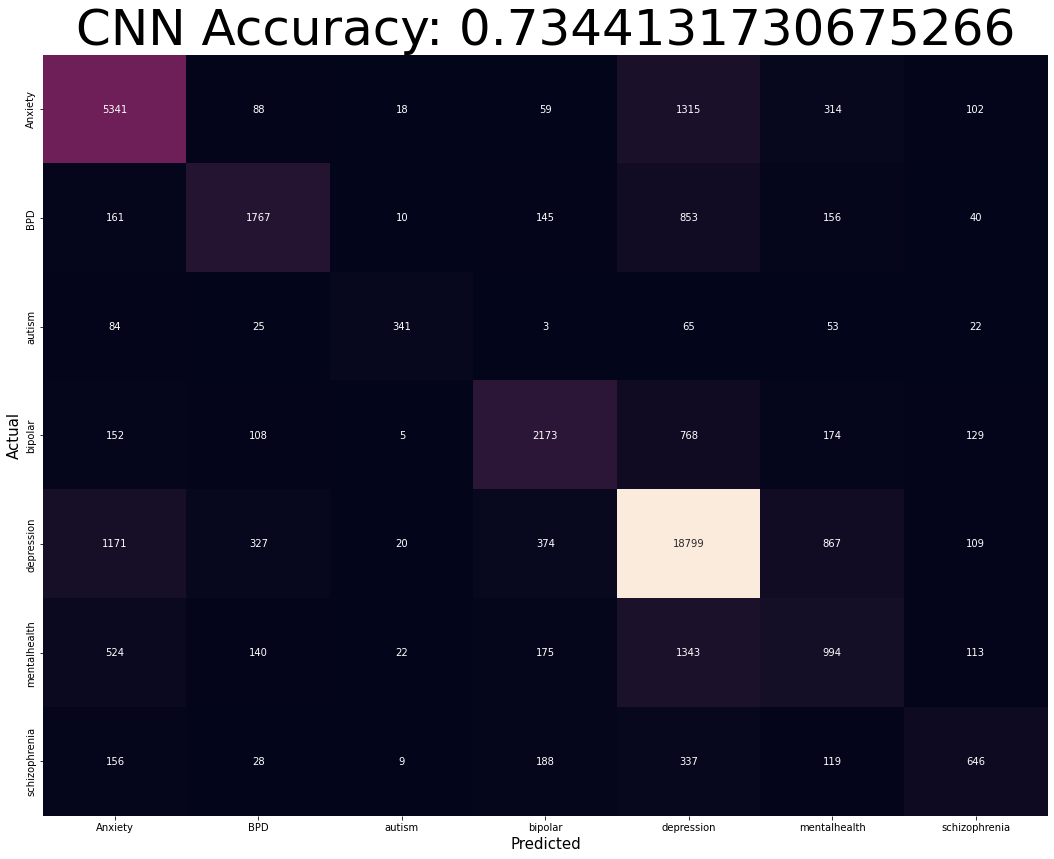

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
cnn_accuracy = accuracy_score(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
#print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

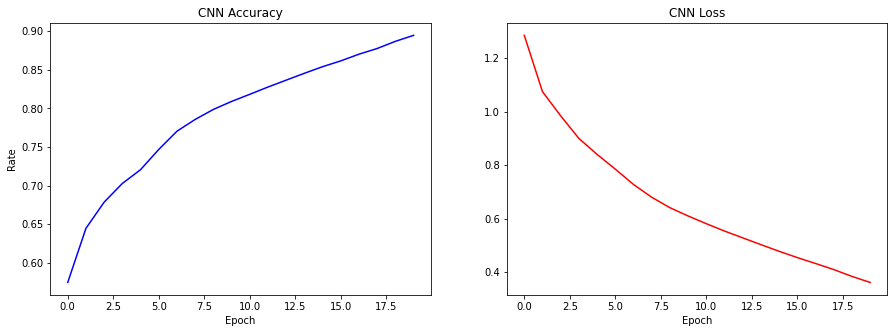

In [ ]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(cnn_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(cnn_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("CNN Accuracy")
axe1[1].title.set_text("CNN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()